## Final Project Submission
* Student name: Alejandro Harrison
* Student pace: self paced
* Scheduled project review date/time: September 5th, 11am
* Instructor name: Claude Fried
* Blog post URL: https://dev.to/crazyjandro/a-not-so-linear-journey-2e4i


## Business Goal
 We're working with a real estate agency that helps customers buy and sell houses. Using Linear Regression to analyze the given dataset, we will help the agency determine which features of a house will increase the value the most. Using that data, we will help the agency advise customers about how renovations made to these house features will increase the value of the house, and by how much.

## Data
This project uses the King County house sales dataset (kc_house_data.csv), which contains 21,597 different entries of houses sold between 2014 and 2015. Each entry contains information about the house such as number of bedrooms, number of bathrooms, total square footage, etc. A full  list and description of the column/variables can be found in "column_names.md".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's open the csv file
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Let's check for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
#Let's check the three variables to see what values they have to make sure it's safe to remove null values

In [6]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [7]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [8]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [9]:
#Looks safe to remove the null values since: 

#For waterfront there should only be "yes" or "no"
#For yr_renovated we don't want missing/unknown values
#For view we also don't want missing/unknown values

df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [10]:
#Let's check for duplicates as well

df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

# Baseline Model

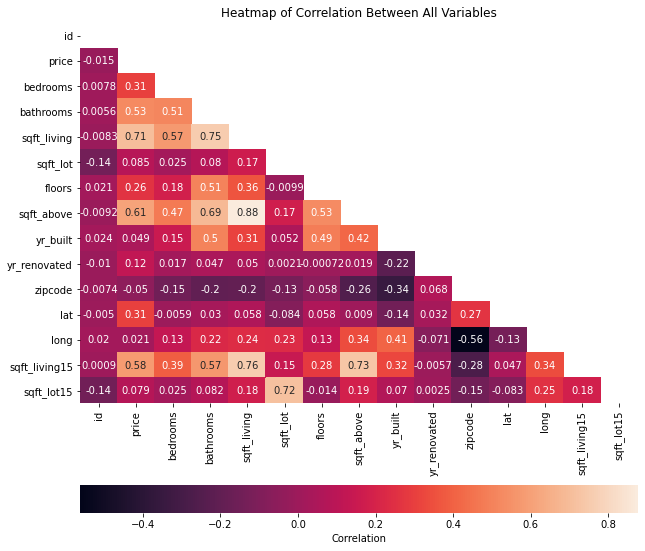

In [11]:
#Let's start off by creating a baseline model
#Let's look at the correlation strengths to find the variable with the strongest correlation with the target variable (price)
#We'll use a heatmap

correlation = df.corr()
#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

#### Looking at the variables correlated with price, it looks like the one most strongly correlated is sqft_living. Let's start creating our regression formula using price and sqft_living. ####

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Create our formula structure
form = "price~sqft_living"

#Fit our model with ols
model = ols(formula = form, data = df).fit()

#Look at model information
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:30   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.516e+04   5205.744    -10.597      0.000   -6.54e+04    -4.5e+04
sqft_living   286.1494      2.285    125.214      0.000     281.670     290.629
==============================================================================
Omnibus:                    11136.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457340.013
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.739   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print("R-Squared:", model.rsquared)
print(model.params)

R-Squared: 0.49870320658566647
Intercept     -55164.727008
sqft_living      286.149370
dtype: float64


## Let's check some regression assumptions ##

### Linearity ###

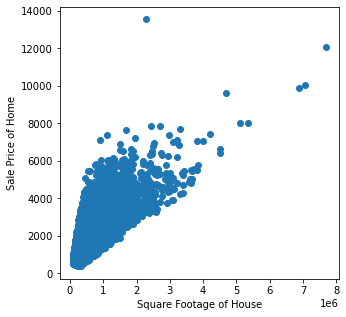

In [14]:
#Let's plot the relationship between price and sqft_living
plt.figure(figsize = (5,5))
plt.scatter(df.price, df.sqft_living);
plt.xlabel("Square Footage of House")
plt.ylabel("Sale Price of Home");

### Normality ###

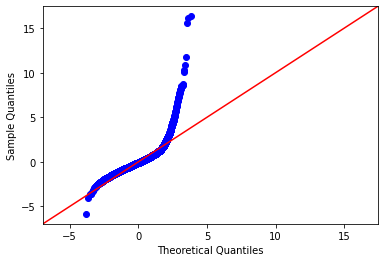

In [15]:
import scipy.stats as stats

#Let's plot the residuals against a standard normal distribution 
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### Homoscedasticity ###

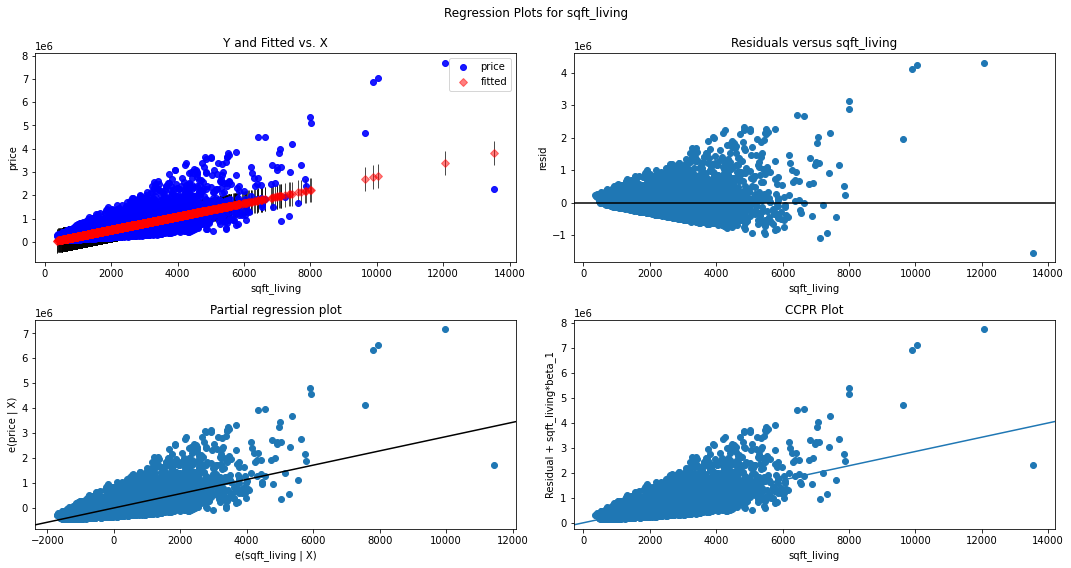

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig);

From testing our assumptions we can see:
* With no other variables, when sqft_living is at 0, the base house price is -$55164.73
* Our R-squared value is somewhat low at 49%
* There is hardly a linear relationship between price and sqft_living
* The model residuals do not follow a full normal distribution
* For our regression plots for sqft_living, we see a cone shape which indicates heteroscedasticity


#### Since our R-squared is low and our regression assumptions are not met, we can say that sqft_living is not ideal for soley modeling a relationship with price. We will need to take a look at additional variables and build a better model. To do this requires multiple regression. ####

# Second Model

In [17]:
#Let's take a look at our dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

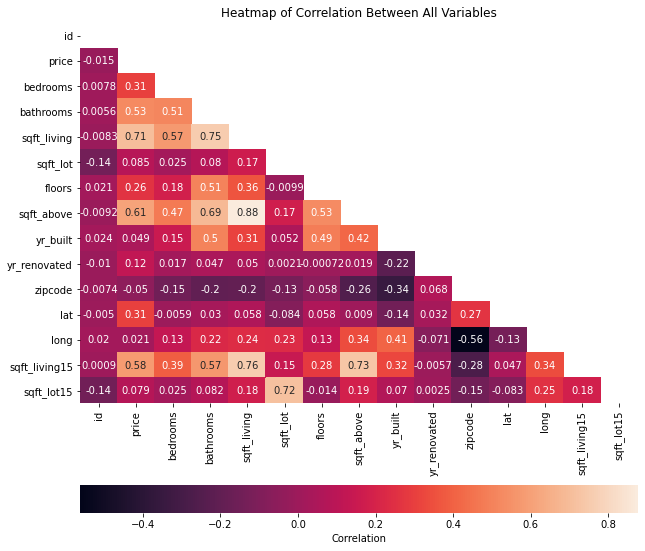

In [18]:
#There's a lot of variables so let's see if we can eliminate some variables
#First we'll create a heatmap to look at the correlation strengths again
correlation = df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

### Looking at the heatmap correlation strengths, we can eliminate some low correlation variables:
* id (also a unique identifier which will not help us in the future for predictions)
* sqft_lot
* yr_renovated
* zipcode
* long
* lat (If we don't need longitude, it doesn't make sense to only put latitude)
* sqft_lot15 (We are not concerned about other neighbor's properties)

### We can eliminate some other variables as well:
* date (not in heatmap, but we're worried about the future and not the past)
* sqft_above (don't need this when we have total square footage)
* sqft_basement (not in heatmap, but sqft of basement is already included in sqft_living)
* sqft_living15 (we are not concerned about other neighbor's properties)


In [19]:
#Let's drop the variables
df.drop(columns = ["id","date", "sqft_lot", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_lot15", "sqft_living15"], axis = 1, inplace = True)

In [20]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
1,538000.0,3,2.25,2570,2.0,NO,NONE,Average,7 Average,1951
3,604000.0,4,3.00,1960,1.0,NO,NONE,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,1.0,NO,NONE,Average,8 Good,1987
5,1230000.0,4,4.50,5420,1.0,NO,NONE,Average,11 Excellent,2001
6,257500.0,3,2.25,1715,2.0,NO,NONE,Average,7 Average,1995
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,NO,NONE,Average,8 Good,2008
21592,360000.0,3,2.50,1530,3.0,NO,NONE,Average,8 Good,2009
21593,400000.0,4,2.50,2310,2.0,NO,NONE,Average,8 Good,2014
21594,402101.0,2,0.75,1020,2.0,NO,NONE,Average,7 Average,2009


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15762 non-null  float64
 1   bedrooms     15762 non-null  int64  
 2   bathrooms    15762 non-null  float64
 3   sqft_living  15762 non-null  int64  
 4   floors       15762 non-null  float64
 5   waterfront   15762 non-null  object 
 6   view         15762 non-null  object 
 7   condition    15762 non-null  object 
 8   grade        15762 non-null  object 
 9   yr_built     15762 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [22]:
#Let's convert floors to an int
df["floors"] = df["floors"].astype("float64").astype("int")

#### Looks like we have a few categorical values, so let's convert them to numerical form



## 1. The waterfront variable



In [23]:
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [24]:
#As we can see there are 2 values in the waterfont column: "NO", and "YES"
#Let's convert the waterfront values into numerical categories where 0 represents "NO" and 1 represents "YES"

df["waterfront"] = df["waterfront"].astype("category").cat.codes

In [25]:
df["waterfront"].unique()

array([0, 1], dtype=int8)

## 2. The view variable

In [26]:
df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [27]:
#Follow previous steps and convert to numerical category type
df["view"] = df["view"].astype("category").cat.codes

In [28]:
df["view"].unique()

array([4, 3, 1, 0, 2], dtype=int8)

## 3. The condition variable

In [29]:
df["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [30]:
#Convert to numerical category type
df["condition"] = df["condition"].astype("category").cat.codes

In [31]:
df["condition"].unique()

array([0, 4, 2, 3, 1], dtype=int8)

## 4. The grade variable

In [32]:
df["grade"].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [33]:
#We only want the number scores, and not the description, since an official description already exists on the King County site.

#Let's create a function to edit the string entries
def keep_numbs(string):
    new_string = ''
    for i in string:
        if i.isdigit():
            new_string = new_string + i
    return new_string

In [34]:
df["grade"] = df["grade"].apply(keep_numbs)

#convert to numerical
df["grade"] = pd.to_numeric(df["grade"])
df["grade"].unique()


array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13], dtype=int64)

## Let's take a look at our DF

In [35]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
1,538000.0,3,2.25,2570,2,0,4,0,7,1951
3,604000.0,4,3.00,1960,1,0,4,4,7,1965
4,510000.0,3,2.00,1680,1,0,4,0,8,1987
5,1230000.0,4,4.50,5420,1,0,4,0,11,2001
6,257500.0,3,2.25,1715,2,0,4,0,7,1995
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2,0,4,0,8,2008
21592,360000.0,3,2.50,1530,3,0,4,0,8,2009
21593,400000.0,4,2.50,2310,2,0,4,0,8,2014
21594,402101.0,2,0.75,1020,2,0,4,0,7,2009


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15762 non-null  float64
 1   bedrooms     15762 non-null  int64  
 2   bathrooms    15762 non-null  float64
 3   sqft_living  15762 non-null  int64  
 4   floors       15762 non-null  int32  
 5   waterfront   15762 non-null  int8   
 6   view         15762 non-null  int8   
 7   condition    15762 non-null  int8   
 8   grade        15762 non-null  int64  
 9   yr_built     15762 non-null  int64  
dtypes: float64(2), int32(1), int64(4), int8(3)
memory usage: 969.7 KB


### Let's create two different DataFrames: One of our target variable (price) and one holding all our other variables

In [37]:
#Target Variable
Y = df["price"]
X = df.drop("price", axis = 1)

## Let's build our multiple regression model

In [38]:
outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = df).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3272.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:34   Log-Likelihood:            -2.1624e+05
No. Observations:               15762   AIC:                         4.325e+05
Df Residuals:                   15752   BIC:                         4.326e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.839e+06   1.57e+05     43.693      0.000    6.53e+06    7.15e+06
bedrooms    -4.033e+04   2380.603    -16.940      0.000    -4.5e+04   -3.57e+04
bathrooms    5.169e+04   4063.325     12.721      0.000    4.37e+04    5.97e+04
sqft_living   177.1449      3.845     46.072      0.000     169.608     184.681
floors       2.723e+04   4242.434      6.418      0.000    1.89e+04    3.55e+04
waterfront   6.918e+05   2.09e+04     33.112      0.000    6.51e+05    7.33e+05
view        -2.529e+04   2045.859    -12.363      0.000   -2.93e+04   -2.13e+04
condition    9163.9358   1524.943      6.009      0.000    6174.872    1.22e+04
grade        1.235e+05   2550.872     48.431      0.000    1.19e+05    1.29e+05
yr_built    -3828.1058     82.312    -46.507      0.000   -3989.446   -3666.766
==============================================================================
Omnibus:                    12136.392   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           934588.019
Skew:                           3.103   Prob(JB):                         0.00
Kurtosis:                      40.209   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From our results so far we can see that:
* Our variable P-values are all very low, suggesting that the relationships between those variables and the target variable price are statistically significant. 
* Our R-squared value is .65, which says that changes in our dependent variable are 65% explained by changes in our independent variables. 

However, before we conclude that the model is sound, let's check some of our assumptions.  

## Assumptions for this model

### Linearity

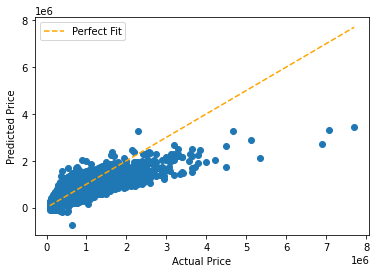

In [40]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y.min(), Y.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y, preds);
ax.set_xlabel("Actual Price");
ax.set_ylabel("Predicted Price");
ax.legend();

### Normality

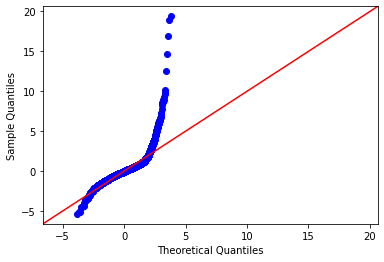

In [41]:
import scipy.stats as stats
residuals = (Y - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

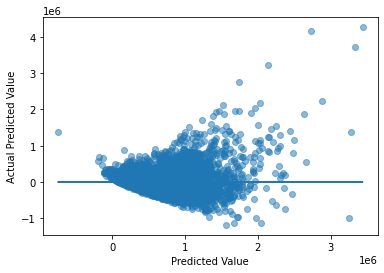

In [42]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Let's check for multicollinearity (above .70)

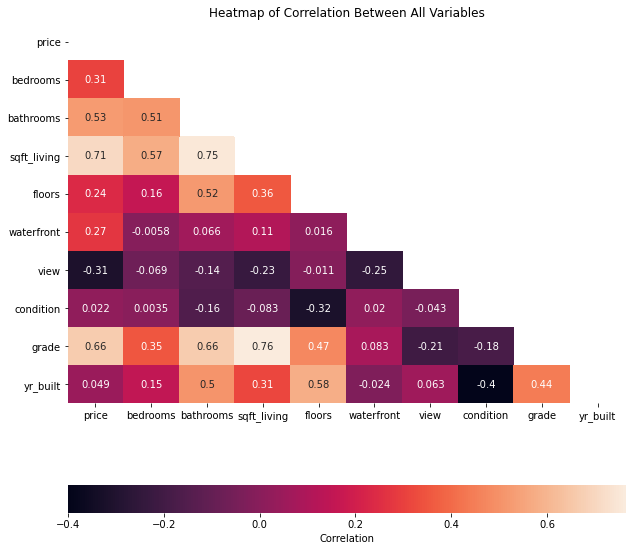

In [43]:
new_df = pd.concat([Y, X], axis = 1)
correlation = new_df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

From testing our assumptions we can see:

* We have quite a few outliers, which disrupts the linear assumption
* The model residuals do not follow a full normal distribution
* Our residuals form a cone shape which indicates heteroscedasticity
* Multicollinearity (above .70) is not a major issue for our data

#### Let's see if we can adjust our model to fix any of the assumptions

# Third Model

In [44]:
#Let's drop view, since conceptually it doesn't make sense that our price would go down as the view rating increases
X = X.drop("view", axis = 1)

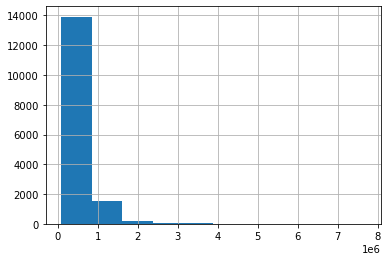

In [45]:
#Let's take a look at the distribution of our target variable
df["price"].hist();

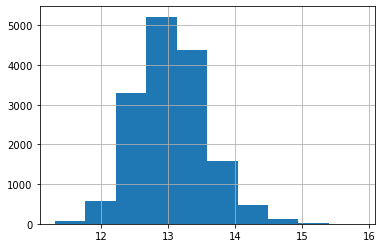

In [46]:
#Let's use log transformation on price to normalize the distribution and see how that effects our model
    
df["price"] = np.log(df["price"])
df["price"].hist();


### Let's build our third model

In [47]:
#Create new Y df with log transformed price
Y_log = df["price"]

#Create new df with log transformed df
new_df = pd.concat([Y_log, X], axis = 1)

outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3508.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:42   Log-Likelihood:                -4183.9
No. Observations:               15762   AIC:                             8386.
Df Residuals:                   15753   BIC:                             8455.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.4266      0.224    100.009      0.000      21.987      22.866
bedrooms       -0.0239      0.003     -7.005      0.000      -0.031      -0.017
bathrooms       0.0907      0.006     15.549      0.000       0.079       0.102
sqft_living     0.0002    5.5e-06     31.893      0.000       0.000       0.000
floors          0.0783      0.006     12.862      0.000       0.066       0.090
waterfront      0.5037      0.029     17.202      0.000       0.446       0.561
condition       0.0171      0.002      7.805      0.000       0.013       0.021
grade           0.2267      0.004     62.155      0.000       0.220       0.234
yr_built       -0.0059      0.000    -50.725      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       70.759   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.347
Skew:                          -0.128   Prob(JB):                     1.60e-17
Kurtosis:                       3.229   Cond. No.                     2.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking our assumptions again

### Linearity

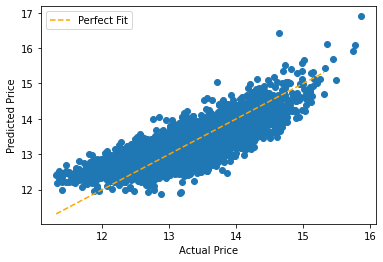

In [49]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

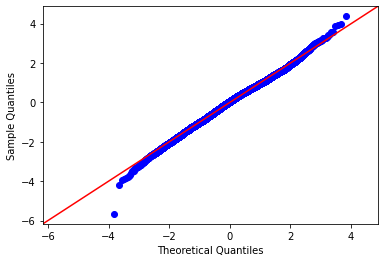

In [50]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

###  Homoscedasticity

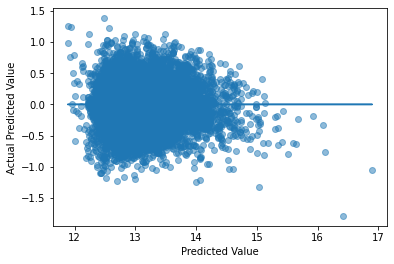

In [51]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Checking for multicollinearity

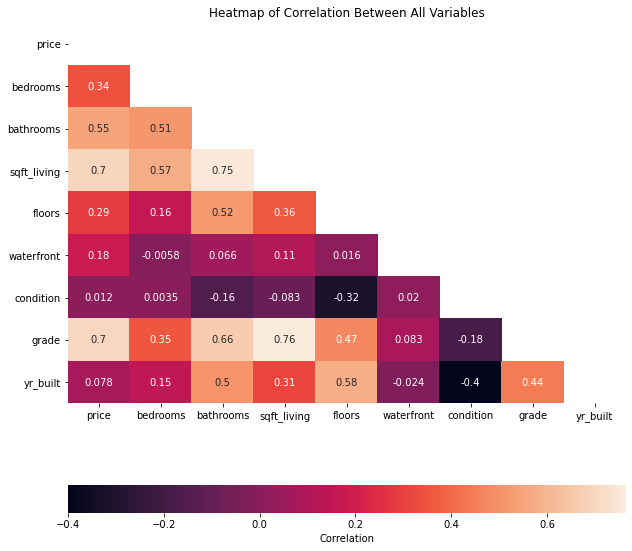

In [52]:
correlation = new_df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

After log transforming our price variable we can see that:
* Our linearity assumption has drastically improved
* The model residuals now follow a normal distribution
* Our residuals now form a more homoscedastic pattern
* Multicollinearity (above .70) is not a major issue for our data


**Therefore, we will keep price log transformed regardless of other changes made to our model.**

### Let's also try log transforming the sqft_living variable  and see how that affects the data

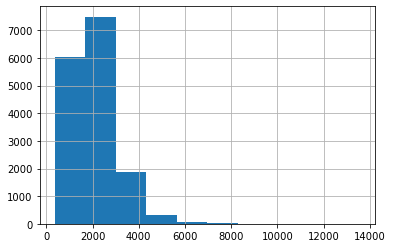

In [53]:
X["sqft_living"].hist();

<AxesSubplot:>

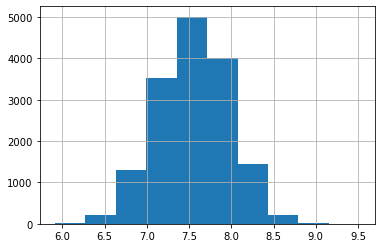

In [54]:
#Log Transform
X["sqft_living"] = np.log(X["sqft_living"])
X["sqft_living"].hist()

In [55]:
#Run model again

new_df = pd.concat([Y_log, X], axis = 1)

outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model2 = ols(formula = formula, data = new_df).fit()

In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3528.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:44   Log-Likelihood:                -4155.3
No. Observations:               15762   AIC:                             8329.
Df Residuals:                   15753   BIC:                             8398.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.4636      0.236     86.531      0.000      20.000      20.927
bedrooms       -0.0360      0.004    -10.178      0.000      -0.043      -0.029
bathrooms       0.0918      0.006     15.884      0.000       0.080       0.103
sqft_living     0.3923      0.012     32.835      0.000       0.369       0.416
floors          0.0768      0.006     12.639      0.000       0.065       0.089
waterfront      0.5443      0.029     18.679      0.000       0.487       0.601
condition       0.0149      0.002      6.825      0.000       0.011       0.019
grade           0.2324      0.004     66.210      0.000       0.226       0.239
yr_built       -0.0063      0.000    -54.048      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       34.709   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.196
Skew:                          -0.067   Prob(JB):                     3.08e-09
Kurtosis:                       3.204   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

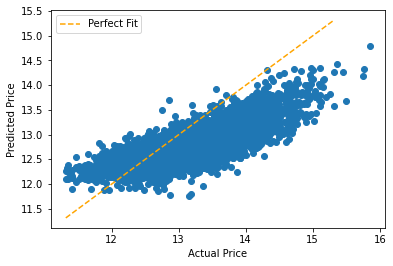

In [57]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

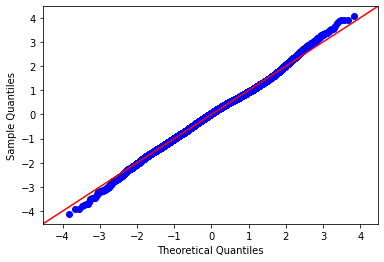

In [58]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

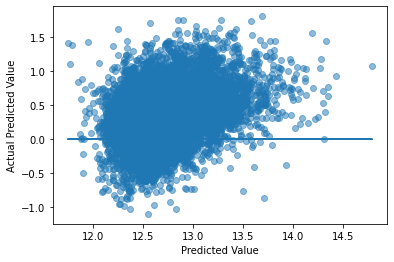

In [59]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### From our data we can see that: 
* All our independent variable p values are less than 0.05, indicating the relationships between those variables and the target   variable price are statistically significant
* Our R-squared score has improved slightly by .002 from our previous score
* Our assumption plots have gotten worse 

**Let's see if we can make any additional changes**

## Let's try removing variables 

We'll try removing yr_built and the waterfront variable, because we cannot renovate the year the house was built, and it'd be extremely hard to create a waterfront view.

### First we'll remove yr_built

In [60]:
X2 = X.drop("yr_built", axis = 1)
new_df2 = pd.concat([Y_log, X2], axis = 1)

In [61]:
outcome = "price"
X_sum = "+".join(X2.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df2).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     3050.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:45   Log-Likelihood:                -5496.0
No. Observations:               15762   AIC:                         1.101e+04
Df Residuals:                   15754   BIC:                         1.107e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2340      0.075    109.993      0.000       8.087       8.381
bedrooms       -0.0266      0.004     -6.914      0.000      -0.034      -0.019
bathrooms       0.0186      0.006      3.049      0.002       0.007       0.031
sqft_living     0.4288      0.013     33.017      0.000       0.403       0.454
floors         -0.0315      0.006     -5.050      0.000      -0.044      -0.019
waterfront      0.6474      0.032     20.449      0.000       0.585       0.709
condition       0.0486      0.002     21.275      0.000       0.044       0.053
grade           0.2122      0.004     55.855      0.000       0.205       0.220
==============================================================================
Omnibus:                       22.289   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.195
Skew:                           0.066   Prob(JB):                     2.50e-05
Kurtosis:                       2.879   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

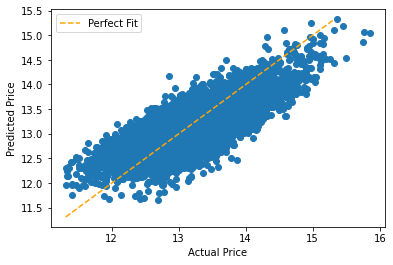

In [63]:
preds = model.predict(X2)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

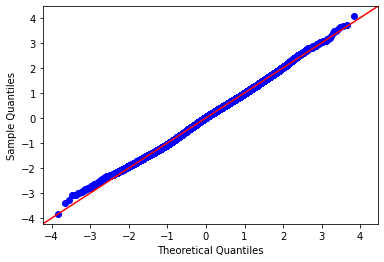

In [64]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

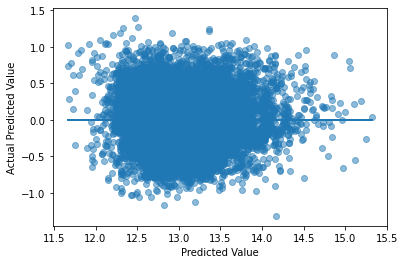

In [65]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X2))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Let's try it with sqft_living not log transformed


In [66]:
X["sqft_living"] = df["sqft_living"]

X2 = X.drop("yr_built", axis = 1)
new_df2 = pd.concat([Y_log, X2], axis = 1)

outcome = "price"
X_sum = "+".join(X2.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df2).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     3131.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:45   Log-Likelihood:                -5376.2
No. Observations:               15762   AIC:                         1.077e+04
Df Residuals:                   15754   BIC:                         1.083e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1112      0.025    450.183      0.000      11.063      11.160
bedrooms       -0.0196      0.004     -5.316      0.000      -0.027      -0.012
bathrooms       0.0109      0.006      1.798      0.072      -0.001       0.023
sqft_living     0.0002   5.87e-06     36.716      0.000       0.000       0.000
floors         -0.0201      0.006     -3.228      0.001      -0.032      -0.008
waterfront      0.5845      0.032     18.536      0.000       0.523       0.646
condition       0.0485      0.002     21.401      0.000       0.044       0.053
grade           0.1977      0.004     50.894      0.000       0.190       0.205
==============================================================================
Omnibus:                       10.513   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.508
Skew:                           0.013   Prob(JB):                      0.00862
Kurtosis:                       2.883   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity 

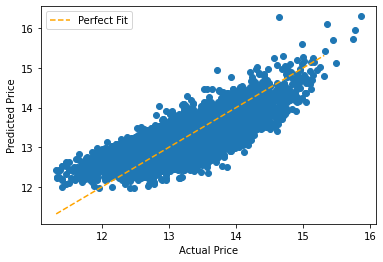

In [68]:
preds = model.predict(X2)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

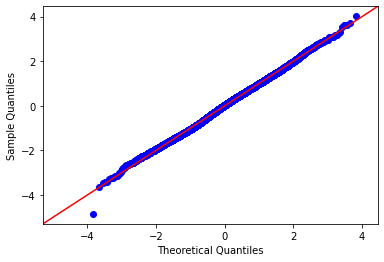

In [69]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

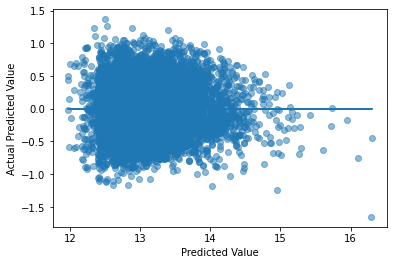

In [70]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X2))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Next we'll try removing only waterfront

In [71]:
#Let's log transform sqft_living again
X["sqft_living"] = np.log(X["sqft_living"])

X3 = X.drop("waterfront", axis = 1)
new_df3 = pd.concat([Y_log, X3], axis = 1)

In [72]:
outcome = "price"
X_sum = "+".join(X3.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df3).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3896.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:46   Log-Likelihood:                -4328.0
No. Observations:               15762   AIC:                             8672.
Df Residuals:                   15754   BIC:                             8733.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.6650      0.239     86.524      0.000      20.197      21.133
bedrooms       -0.0409      0.004    -11.454      0.000      -0.048      -0.034
bathrooms       0.0955      0.006     16.350      0.000       0.084       0.107
sqft_living     0.4021      0.012     33.322      0.000       0.378       0.426
floors          0.0765      0.006     12.453      0.000       0.064       0.088
condition       0.0153      0.002      6.931      0.000       0.011       0.020
grade           0.2346      0.004     66.150      0.000       0.228       0.242
yr_built       -0.0064      0.000    -54.788      0.000      -0.007      -0.006
==============================================================================
Omnibus:                       37.323   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.876
Skew:                          -0.018   Prob(JB):                     6.62e-11
Kurtosis:                       3.265   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

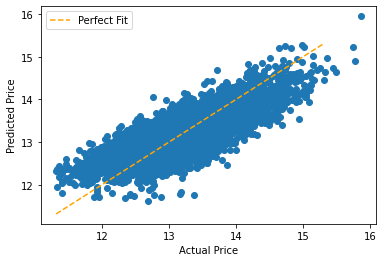

In [74]:
preds = model.predict(X3)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

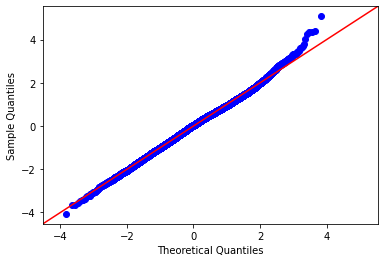

In [75]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

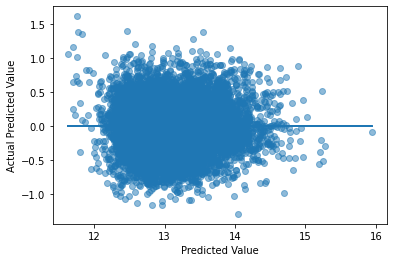

In [76]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X3))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Let's try it again with sqft_living not log transformed

In [77]:
X["sqft_living"] = df["sqft_living"]

X3 = X.drop("waterfront", axis = 1)
new_df3 = pd.concat([Y_log, X3], axis = 1)

In [78]:
outcome = "price"
X_sum = "+".join(X3.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df3).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3894.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:47   Log-Likelihood:                -4330.6
No. Observations:               15762   AIC:                             8677.
Df Residuals:                   15754   BIC:                             8739.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.6416      0.226    100.192      0.000      22.199      23.085
bedrooms       -0.0290      0.003     -8.465      0.000      -0.036      -0.022
bathrooms       0.0920      0.006     15.635      0.000       0.080       0.104
sqft_living     0.0002   5.53e-06     33.238      0.000       0.000       0.000
floors          0.0785      0.006     12.771      0.000       0.066       0.091
condition       0.0175      0.002      7.910      0.000       0.013       0.022
grade           0.2269      0.004     61.639      0.000       0.220       0.234
yr_built       -0.0061      0.000    -51.260      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       64.940   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.582
Skew:                          -0.091   Prob(JB):                     1.42e-17
Kurtosis:                       3.291   Cond. No.                     2.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

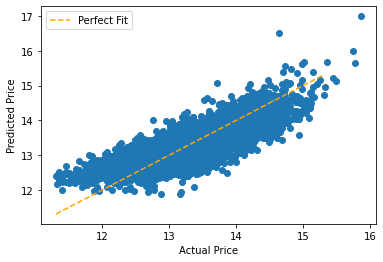

In [80]:
preds = model.predict(X3)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

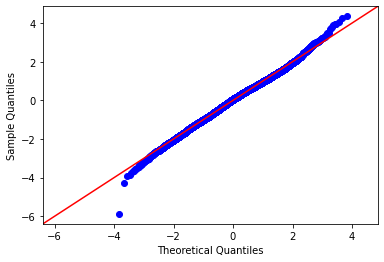

In [81]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

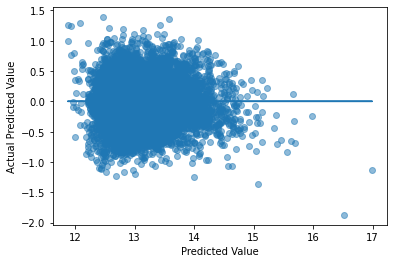

In [82]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X3))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### What if we remove both?

In [83]:
#Let's log transform sqft_living again
X["sqft_living"] = np.log(X["sqft_living"])

X4 = X.drop(columns = ["waterfront", "yr_built"], axis = 1)
new_df4 = pd.concat([Y_log, X4], axis = 1)

In [84]:
outcome = "price"
X_sum = "+".join(X4.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df4).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     3398.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:48   Log-Likelihood:                -5702.5
No. Observations:               15762   AIC:                         1.142e+04
Df Residuals:                   15755   BIC:                         1.147e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.1441      0.076    107.566      0.000       7.996       8.293
bedrooms       -0.0322      0.004     -8.265      0.000      -0.040      -0.025
bathrooms       0.0211      0.006      3.400      0.001       0.009       0.033
sqft_living     0.4415      0.013     33.592      0.000       0.416       0.467
floors         -0.0348      0.006     -5.505      0.000      -0.047      -0.022
condition       0.0500      0.002     21.607      0.000       0.045       0.054
grade           0.2143      0.004     55.692      0.000       0.207       0.222
==============================================================================
Omnibus:                       37.156   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.378
Skew:                           0.117   Prob(JB):                     7.65e-09
Kurtosis:                       2.957   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

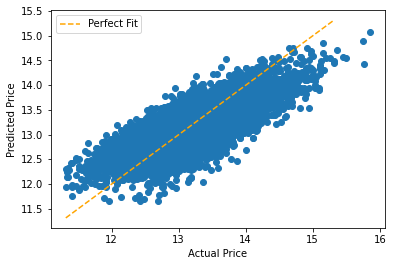

In [86]:
preds = model.predict(X4)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

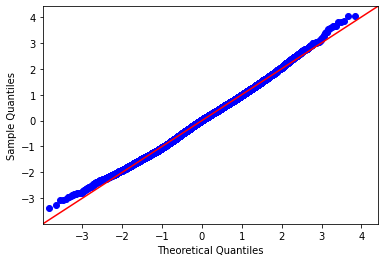

In [87]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

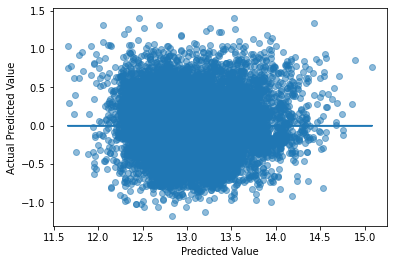

In [88]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X4))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### One last time without log transforming sqft_living

In [89]:
X["sqft_living"] = df["sqft_living"]

X4 = X.drop(columns = ["waterfront", "yr_built"], axis = 1)
new_df4 = pd.concat([Y_log, X4], axis = 1)

In [90]:
outcome = "price"
X_sum = "+".join(X4.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df4).fit()

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3519.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:49   Log-Likelihood:                -5546.3
No. Observations:               15762   AIC:                         1.111e+04
Df Residuals:                   15755   BIC:                         1.116e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1185      0.025    445.714      0.000      11.070      11.167
bedrooms       -0.0254      0.004     -6.867      0.000      -0.033      -0.018
bathrooms       0.0107      0.006      1.754      0.079      -0.001       0.023
sqft_living     0.0002    5.9e-06     38.293      0.000       0.000       0.000
floors         -0.0220      0.006     -3.499      0.000      -0.034      -0.010
condition       0.0496      0.002     21.672      0.000       0.045       0.054
grade           0.1973      0.004     50.254      0.000       0.190       0.205
==============================================================================
Omnibus:                        8.766   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.728
Skew:                           0.050   Prob(JB):                       0.0127
Kurtosis:                       2.944   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

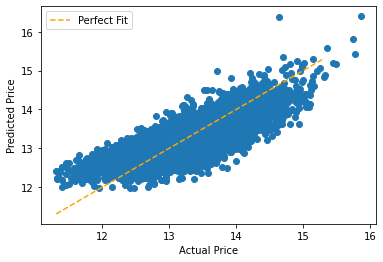

In [92]:
preds = model.predict(X4)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

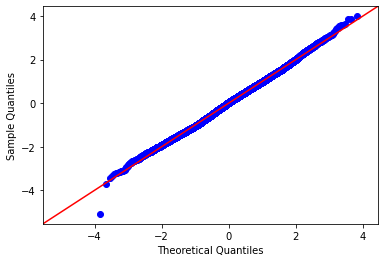

In [93]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

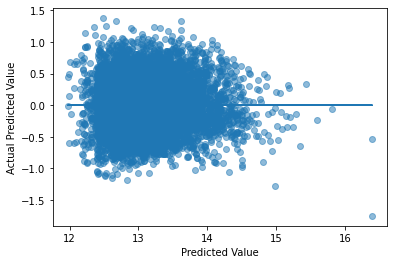

In [94]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X4))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

## Final Verdict 

It seems the most advantageous thing to do is to log transform only price. The assumptions are somewhat improved when we remove the yr_built variable, but the R-squared score decreases by .065 when sqft_living is still log transformed, and .058 when not.  When we remove the waterfront variable, it still decreases by .006 (regardless of log transformation of sqft_living). Log transforming sqft_living makes it harder to conceptualize in terms of coefficients, so we will keep it untransformed.  Therefore the final changes we make are log transforming price.

In [95]:
outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model2 = ols(formula = formula, data = new_df).fit()

In [96]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3528.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:49   Log-Likelihood:                -4155.3
No. Observations:               15762   AIC:                             8329.
Df Residuals:                   15753   BIC:                             8398.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.4636      0.236     86.531      0.000      20.000      20.927
bedrooms       -0.0360      0.004    -10.178      0.000      -0.043      -0.029
bathrooms       0.0918      0.006     15.884      0.000       0.080       0.103
sqft_living     0.3923      0.012     32.835      0.000       0.369       0.416
floors          0.0768      0.006     12.639      0.000       0.065       0.089
waterfront      0.5443      0.029     18.679      0.000       0.487       0.601
condition       0.0149      0.002      6.825      0.000       0.011       0.019
grade           0.2324      0.004     66.210      0.000       0.226       0.239
yr_built       -0.0063      0.000    -54.048      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       34.709   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.196
Skew:                          -0.067   Prob(JB):                     3.08e-09
Kurtosis:                       3.204   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting our results

In [97]:
print("Our final variable coefficients and intercept are: \n\n", model2.params)


Our final variable coefficients and intercept are: 

 Intercept      20.463581
bedrooms       -0.036029
bathrooms       0.091786
sqft_living     0.392289
floors          0.076761
waterfront      0.544310
condition       0.014931
grade           0.232389
yr_built       -0.006270
dtype: float64


First off, we can see that our base house price is about $20.46. Then from there, we can look at the coefficients. Because we log transformed our target variable price, our variable coefficients can be represented as percentage changes of price for each unit increase. We will breakdown each variable coefficient below.

#### Bedroom and Bathroom Variables

First we have the bedroom and bathroom variables. For each additional bedroom added, our house price will go down by a certain percentage. In order to find that percentage we need to do some quick math involving the coefficient.

In [98]:
import math

bed_coeff = model2.params["bedrooms"]
bed_percnt = 100 * (math.exp(bed_coeff) - 1)
bed_percnt

-3.538727479262549

Therefore according to our model, for each additional bedroom added our price will go down by about 3.5%. We can do the same thing for the bathrooms variable. 

In [99]:
bath_coeff = model2.params["bathrooms"]
bath_percnt = 100 * (math.exp(bath_coeff)-1)
bath_percnt

9.613019835719982

For each additional bathroom addded, our house price will go up by about 9.6%. 

#### Sqft_living variable

Next up we have total living square footage. We'll continue to use the same math as before.

In [100]:
sqft_coeff = model2.params["sqft_living"]
sqft_percnt = 100 * (math.exp(sqft_coeff)-1)
sqft_percnt

48.03660306608717

Therefore, for each 1 unit increase in total square footage, the price will increase by 48%. 

#### Floors variable

In [101]:
floor_coeff = model2.params["floors"]
floor_percnt = 100 * (math.exp(floor_coeff)-1)
floor_percnt

7.978425016282387

For each additional floor added, the price will increase by about 8%. 

#### The condition variable

Here we have a label encoded variable. We'll start off with the waterfront variable. Waterfront has 2 values: Yes and No. Let's do the same math we did before. Condition is the overall condition of the house related to maintenance of house. Condition has the following values: 'Average', 'Very Good', 'Good', 'Poor', and 'Fair'. The breakdown of the scale can be found at https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

In [102]:
cond_coeff = model2.params["condition"]
cond_percnt = 100 * (math.exp(cond_coeff)-1)
cond_percnt

1.5042644751156464

For each increase in condition value ranking , the house price will increase by about 1.5%

#### The grade variable

The grade variable is the overall grade of the house based on construction and design of house. It's based on a 3-13 scale, which can be found at https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

In [103]:
grade_coeff = model2.params["grade"]
grade_percnt = 100 * (math.exp(grade_coeff)-1)
grade_percnt

26.161008409042473

For each increase in grade value ranking, the house price will increase by about 26.2%.

#### The yr_built variable

Lastly, we have yr_built, which is what year the house was built.

In [104]:
year_coeff = model2.params["yr_built"]
year_percnt = 100 * (math.exp(year_coeff)-1)
year_percnt

-0.6250414173200158

For each year newer the house is, the price will decrease by about .63%.

## Conclusion

Our goal for this project was to use previous King County housing data from 2014-2015 to identify which features would best increase the value of a house in order for it to be sold (keeping in mind the person selling the house would need to be able to renovate these features). After identifying these features, we will then present our data to the Real Estate agency, so that they may communicate to their customers which features would be most advantageous to renovate. 

Since the customer selling the house needs to be able to renovate the features chosen, we can rule out some of the features.The yr_built can be eliminated, since one cannot change the year that the house was built. The floor variable can also be eliminated since it would not be worthwhile to add an entire new floor level for the price to only go up by about 8%. Without adding or changing anything else, an increase in bedrooms would actually bring down the price by about 3.5%, therefore the bedrooms variable can be eliminated. Finally, there's the issue of the condition variable. Increasing the condition ranking of the house will only increase the price by about 1.5%. Therefore the variables that should be picked are **number of bathrooms**, **living square footage**, and **grade of the house**.

Increasing the number of bathrooms would be beneficial, since adding one bathroom brings a price increase of 9.6%.  Increasing the grade rating of a house goes hand in hand with the other two features, since the grade rating is based on construction quality of renovations made to the house. A higher rating is associated with more square footage, as well as higher quality bathroom fixtures. The price percentage increase per each square foot unit in addition to being an impressive 48%, will also help improve the grade rating. Other improvements to the house to change the grade rating can be made such as increasing the quality of the woodwork and adding more luxurious materials such as marble.